# <font color = 'Brown'> Heart Disease Prediction <font>

Heart disease is the number one cause of death worldwide, so if you're looking to use data science for good you've come to the right place. To learn how to prevent heart disease we must first learn to reliably detect it.

Preventing heart disease is important. Good data-driven systems for predicting heart disease can improve the entire research and prevention process, making sure that more people can live healthy lives.
In the United States, the Centers for Disease Control and Prevention is a good resource for information about heart disease. According to their website:
-	About 610,000 people die of heart disease in the United States every year–that’s 1 in every 4 deaths.
-	Heart disease is the leading cause of death for both men and women. More than half of the deaths due to heart disease in 2009 were in men.
-	Coronary heart disease (CHD) is the most common type of heart disease, killing over 370,000 people annually.
-	Every year about 735,000 Americans have a heart attack. Of these, 525,000 are a first heart attack and 210,000 happen in people who have already had a heart attack.
-	Heart disease is the leading cause of death for people of most ethnicities in the United States, including African Americans, Hispanics, and whites. For American Indians or Alaska Natives and Asians or Pacific Islanders, heart disease is second only to cancer.


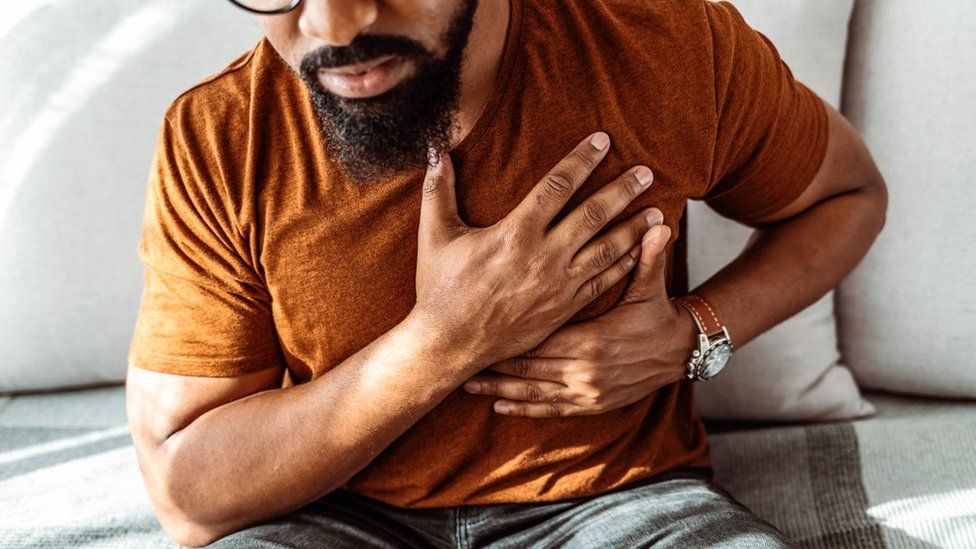

# <font color = 'Brown'> Predicting if a person has heart disease using Machine Learning <font>
This notebook details various python-based ML and data science libraries in an attempt to build a model which will be able to confidently predict if a person suffers from heart disease.

The following pipeline will be followed :
- Problem Definition
- Data 
- Evaluvation 
- Features 
- Modelling 
- Experimentation

# <font color = 'Brown'> Problem Definition <font>
> The goal is to predict if heart disease present, which represents whether or not a patient has heart disease:
- 0 represents no heart disease present
- 1 represents heart disease present|


### Preparing the tools
We will prepare the tools in order to build the model:

In [47]:
# All the EDA (exploratory data anlalysis)
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

%matplotlib inline 

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score,f1_score
from sklearn.metrics import plot_roc_curve,roc_auc_score

# <font color = 'Brown'> Data <font>
There are 14 columns in the dataset, where the patient_id column is a unique and random identifier. The remaining 13 features are described in the section below.

### Dataset values

In [48]:
### Importing the data 
df = pd.read_csv(r'C:\Users\ethan\Documents\CDS\Project[Internship]\PRCP-1016-HeartDieseasePred\values.csv')
df_extra_column = pd.read_csv(r'C:\Users\ethan\Documents\CDS\Project[Internship]\PRCP-1016-HeartDieseasePred\labels.csv')
df = df.join(df_extra_column['heart_disease_present'])

In [49]:
#checking info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   patient_id                            180 non-null    object 
 1   slope_of_peak_exercise_st_segment     180 non-null    int64  
 2   thal                                  180 non-null    object 
 3   resting_blood_pressure                180 non-null    int64  
 4   chest_pain_type                       180 non-null    int64  
 5   num_major_vessels                     180 non-null    int64  
 6   fasting_blood_sugar_gt_120_mg_per_dl  180 non-null    int64  
 7   resting_ekg_results                   180 non-null    int64  
 8   serum_cholesterol_mg_per_dl           180 non-null    int64  
 9   oldpeak_eq_st_depression              180 non-null    float64
 10  sex                                   180 non-null    int64  
 11  age                

In [50]:
#checking describe
df.describe()

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,1.550000,131.311111,3.155556,0.694444,0.161111,1.050000,249.211111,1.010000,0.688889,54.811111,149.483333,0.316667,0.444444
std,0.618838,17.010443,0.938454,0.969347,0.368659,0.998742,52.717969,1.121357,0.464239,9.334737,22.063513,0.466474,0.498290
min,1.000000,94.000000,1.000000,0.000000,0.000000,0.000000,126.000000,0.000000,0.000000,29.000000,96.000000,0.000000,0.000000
25%,1.000000,120.000000,3.000000,0.000000,0.000000,0.000000,213.750000,0.000000,0.000000,48.000000,132.000000,0.000000,0.000000
50%,1.000000,130.000000,3.000000,0.000000,0.000000,2.000000,245.500000,0.800000,1.000000,55.000000,152.000000,0.000000,0.000000
75%,2.000000,140.000000,4.000000,1.000000,0.000000,2.000000,281.250000,1.600000,1.000000,62.000000,166.250000,1.000000,1.000000
max,3.000000,180.000000,4.000000,3.000000,1.000000,2.000000,564.000000,6.200000,1.000000,77.000000,202.000000,1.000000,1.000000


### Rename the column names

In [51]:
df.rename(columns={
    'patient_id' : 'id',
    'slope_of_peak_exercise_st_segment':'slope',
    'thal':'thal',
    'resting_blood_pressure':'bp',
    'chest_pain_type':'cp',
    'num_major_vessels':'nmv',
    'fasting_blood_sugar_gt_120_mg_per_dl':'bs',
    'resting_ekg_results':'rekg',
    'serum_cholesterol_mg_per_dl':'chol',
    'oldpeak_eq_st_depression':'old',
    'sex':'sex',
    'age':'age',
    'max_heart_rate_achieved':'hr',
    'exercise_induced_angina':'eia',
    'heart_disease_present':'target'
}, inplace = True)
df.head()

,id,slope,thal,bp,cp,nmv,bs,rekg,chol,old,sex,age,hr,eia,target
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0


###  Changing categorical data into binary data

In [52]:
#chnging thal values
df['thal'].unique()

array(['normal', 'reversible_defect', 'fixed_defect'], dtype=object)

In [53]:
for data in df.thal:
    if data == 'normal' :
        df.thal= 1
    elif data == 'reversible_defect' :
        df.thal= 2
    else :
        df.thal= 3

In [54]:
df

,id,slope,thal,bp,cp,nmv,bs,rekg,chol,old,sex,age,hr,eia,target
0,0z64un,1,1,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,1,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,1,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,1,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,1,178,1,0,0,2,270,4.2,1,59,145,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,5qfar3,2,1,125,4,2,1,0,254,0.2,1,67,163,0,1
176,2s2b1f,2,1,180,4,0,0,1,327,3.4,0,55,117,1,1
177,nsd00i,2,1,125,3,0,0,0,309,1.8,1,64,131,1,1
178,0xw93k,1,1,124,3,2,1,0,255,0.0,1,48,175,0,0


# <font color = 'Brown'> Evaluvation <font>

# <font color = 'Brown'> Features <font>

# <font color = 'Brown'> Modeling <font>